In [38]:
import pandas as pd
import numpy as np
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from tifffile import imsave
import nibabel as nb
import random

from sklearn.preprocessing import MinMaxScaler
import glob

In [39]:
import tensorflow 
tensorflow.__version__

'2.11.0'

In [40]:
train_data_path = "./data/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/"

# Displaying one image
Loading image with nibabel

In [41]:
test_image_flair = nb.load(train_data_path+"BraTS20_Training_355/BraTS20_Training_355_flair.nii").get_fdata()
test_image_seg = nb.load(train_data_path+"BraTS20_Training_355/BraTS20_Training_355_seg.nii").get_fdata()
test_image_t1 = nb.load(train_data_path+"BraTS20_Training_355/BraTS20_Training_355_t1ce.nii").get_fdata()
test_image_t2 = nb.load(train_data_path+"BraTS20_Training_355/BraTS20_Training_355_t2.nii").get_fdata()

Scaling data using MinMaxScaler()

In [42]:
scaler = MinMaxScaler()

In [43]:
test_image_flair = scaler.fit_transform(test_image_flair.reshape(-1, test_image_flair.shape[-1])).reshape(test_image_flair.shape)
# test_image_seg = scaler.fit_transform(test_image_seg.reshape(-1, test_image_seg.shape[-1])).reshape(test_image_seg.shape)
test_image_t1 = scaler.fit_transform(test_image_t1.reshape(-1, test_image_t1.shape[-1])).reshape(test_image_t1.shape)
test_image_t2 = scaler.fit_transform(test_image_t2.reshape(-1, test_image_t2.shape[-1])).reshape(test_image_t2.shape)


In [44]:
# Testing scale
print("The minimum value is: ",test_image_flair.min())
print("The maximum value is: ",test_image_flair.max())

The minimum value is:  0.0
The maximum value is:  1.0


In [45]:
test_image_flair.shape

(240, 240, 155)

In [46]:
test_image_flair.shape
# test_image_flair

(240, 240, 155)

Mask

In [47]:
# test_image_seg is going to be mask with 4 labels
np.unique(test_image_seg)

array([0., 1., 2., 4.])

In [48]:
# Converting to int
test_image_seg = test_image_seg.astype(np.uint8)
np.unique(test_image_seg)

array([0, 1, 2, 4], dtype=uint8)

In [49]:
# reassigning value 4 to 3
test_image_seg[test_image_seg == 4] = 3
np.unique(test_image_seg)

array([0, 1, 2, 3], dtype=uint8)

In [50]:
# np.unique(test_image_flair).shape

Plotting Image with random slices

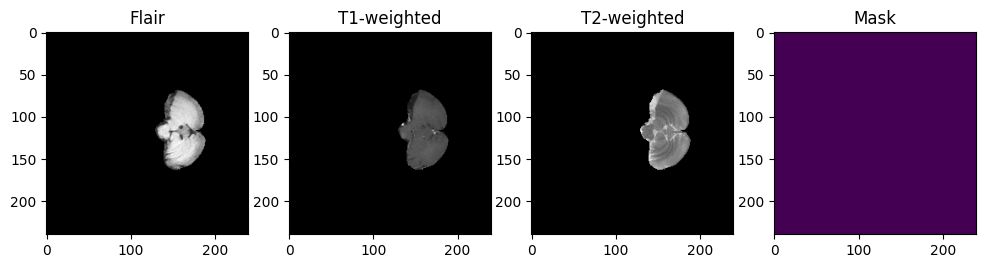

In [51]:
# Random value (dim)
slice = random.randint(0, test_image_seg.shape[2])

# Figure
plt.figure(figsize=(12,8))

# Flair image
plt.subplot(141)
plt.imshow(test_image_flair[:,:,slice], cmap='gray')
plt.title("Flair")

# T1-weighted image
plt.subplot(142)
plt.imshow(test_image_t1[:,:,slice], cmap='gray')
plt.title("T1-weighted")

# T2-weighted image
plt.subplot(143)
plt.imshow(test_image_t2[:,:,slice], cmap='gray')
plt.title("T2-weighted")

# Mask image
plt.subplot(144)
plt.imshow(test_image_seg[:,:,slice])
plt.title("Mask")

plt.show()

# Combining 3 images by exploring to channels and Cropping

3 images T1,T2,Flair are going to be combined since thay have more informative


In [52]:
combined = np.stack([test_image_flair,test_image_t2,test_image_t1],axis=3)    

In [53]:
combined.shape # (240, 240, 155, 3)

(240, 240, 155, 3)

Cropping image

In [54]:
# Crop combined
combined_cropped = combined[56:184,56:184,13:141]  

# Crop MASK
mask_cropped = test_image_seg[56:184,56:184,13:141] 

In [55]:
print("Cropped shape of combined image: ", combined_cropped.shape)
print("Cropped shape of mask image: ", mask_cropped.shape)

Cropped shape of combined image:  (128, 128, 128, 3)
Cropped shape of mask image:  (128, 128, 128)


Plotting cropped image

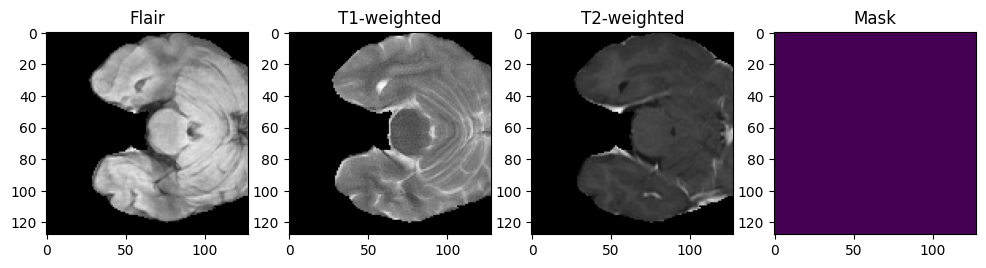

In [56]:
# Random value (dim)
slice = random.randint(0, test_image_seg.shape[2])

# Figure
plt.figure(figsize=(12,8))

# Flair image
plt.subplot(141)
plt.imshow(combined_cropped[:,:,slice,0], cmap='gray')
plt.title("Flair")

# T1-weighted image
plt.subplot(142)
plt.imshow(combined_cropped[:,:,slice,1], cmap='gray')
plt.title("T1-weighted")

# T2-weighted image
plt.subplot(143)
plt.imshow(combined_cropped[:,:,slice,2], cmap='gray')
plt.title("T2-weighted")

# Mask image
plt.subplot(144)
plt.imshow(mask_cropped[:,:,slice])
plt.title("Mask")

plt.show()

Saving test data

In [57]:
# imsave("BraTS2020_TrainingData/combined355.tiff", combined_cropped)

np.save('./data/BraTS2020_TrainingData/test_data.npy', combined_cropped)


In [58]:
val, counts = np.unique(mask_cropped, return_counts=True)
print(val,counts)
print()


[0 1 2 3] [1959129   32235   45483   60305]



Check by loading file 

In [59]:
test_img = np.load("./data/BraTS2020_TrainingData/test_data.npy")

In [60]:
test_img.shape == combined_cropped.shape

True

In [61]:
test_img == combined_cropped 

array([[[[ True,  True,  True],
         [ True,  True,  True],
         [ True,  True,  True],
         ...,
         [ True,  True,  True],
         [ True,  True,  True],
         [ True,  True,  True]],

        [[ True,  True,  True],
         [ True,  True,  True],
         [ True,  True,  True],
         ...,
         [ True,  True,  True],
         [ True,  True,  True],
         [ True,  True,  True]],

        [[ True,  True,  True],
         [ True,  True,  True],
         [ True,  True,  True],
         ...,
         [ True,  True,  True],
         [ True,  True,  True],
         [ True,  True,  True]],

        ...,

        [[ True,  True,  True],
         [ True,  True,  True],
         [ True,  True,  True],
         ...,
         [ True,  True,  True],
         [ True,  True,  True],
         [ True,  True,  True]],

        [[ True,  True,  True],
         [ True,  True,  True],
         [ True,  True,  True],
         ...,
         [ True,  True,  True],
         [ T

Converting mask to categorical

In [62]:
mask_cropped = to_categorical(mask_cropped, num_classes=4)
mask_cropped.shape

(128, 128, 128, 4)

# Applying for all images

We have done so far with one image, now, it is time to apply what we did for all images in our dataset

In [63]:
# Getting filenames
t2_list = sorted(glob.glob('./data/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/*/*t2.nii'))
t1_list = sorted(glob.glob('./data/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/*/*t1ce.nii'))
flair_list = sorted(glob.glob('./data/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/*/*flair.nii'))
mask_list = sorted(glob.glob('./data/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/*/*seg.nii'))

In [64]:
print('Number of files: ',len(t2_list))
print(t2_list[0])
print(t1_list[0])
print(flair_list[0])
print(mask_list[0])

Number of files:  369
./data/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData\BraTS20_Training_001\BraTS20_Training_001_t2.nii
./data/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData\BraTS20_Training_001\BraTS20_Training_001_t1ce.nii
./data/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData\BraTS20_Training_001\BraTS20_Training_001_flair.nii
./data/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData\BraTS20_Training_001\BraTS20_Training_001_seg.nii


To run the following cell create 2 directories for images and masks
The directory should be migth look somehow like "./data/BraTS2020_TrainingData/Input_Data/images" for images and "./data/BraTS2020_TrainingData/Input_Data/masks" for masks

In [65]:
n = len(t2_list)

for img in range(n):
    flair_img = nb.load(flair_list[img]).get_fdata()
    t1_img = nb.load(t1_list[img]).get_fdata()
    t2_img = nb.load(t2_list[img]).get_fdata()
    mask_img = nb.load(mask_list[img]).get_fdata()

    flair_img = scaler.fit_transform(flair_img.reshape(-1, flair_img.shape[-1])).reshape(flair_img.shape)
    t1_img = scaler.fit_transform(t1_img.reshape(-1, t1_img.shape[-1])).reshape(t1_img.shape)
    t2_img = scaler.fit_transform(t2_img.reshape(-1, t2_img.shape[-1])).reshape(t2_img.shape)

    mask_img = mask_img.astype(np.uint8)

    mask_img[mask_img == 4] = 3

    combined = np.stack([flair_img,t1_img,t2_img],axis=3)  

    # Crop combined
    combined_cropped = combined[56:184,56:184,13:141]  

    # Crop MASK
    mask_cropped = test_image_seg[56:184,56:184,13:141] 

    val, counts = np.unique(mask_cropped, return_counts=True)

    if (1-(counts[0]/counts.sum())) > 0.01:
        mask_cropped = to_categorical(mask_cropped, num_classes=4)
        np.save('./data/BraTS2020_TrainingData/Input_Data/images/image_' + str(img) + '.npy', combined_cropped)
        np.save('./data/BraTS2020_TrainingData/Input_Data/masks/mask_' + str(img) + '.npy', mask_cropped)
    

# Do the same steps for Validaiton (Test) Data

In [66]:
import splitfolders

In [67]:
input_folder = "./data/BraTS2020_TrainingData/Input_Data/"
output_folder = "./data/BraTS2020_TrainingData/Output_Data/"

splitfolders.ratio(input_folder,output=output_folder, seed=42,ratio=(.75,.25),group_prefix=None)


1854.603271484375
[0 1 2 4]
[0 1 2 3]


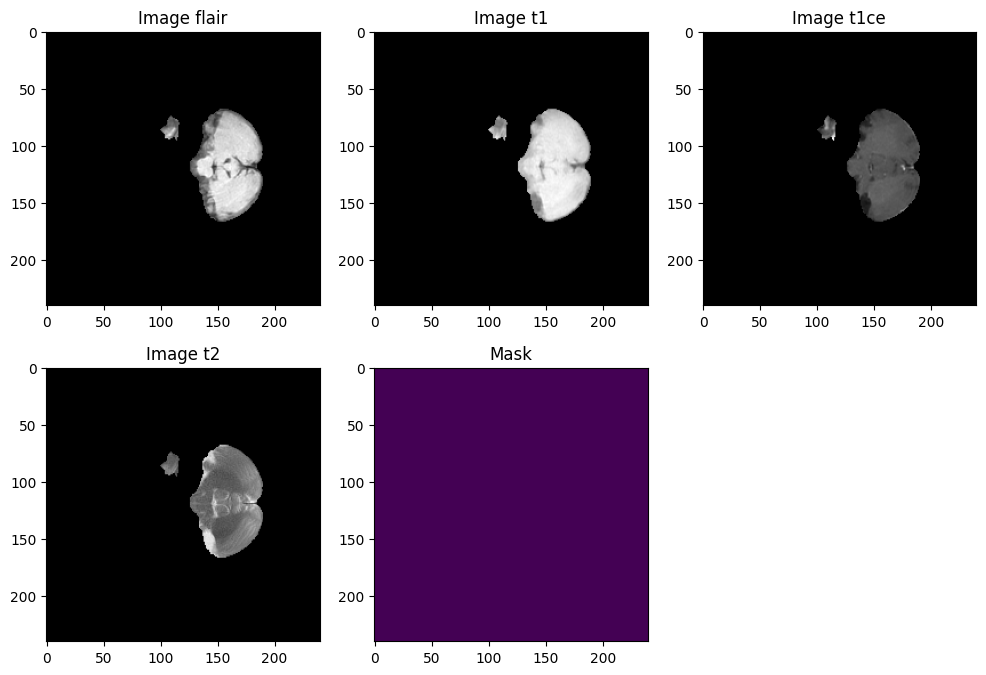

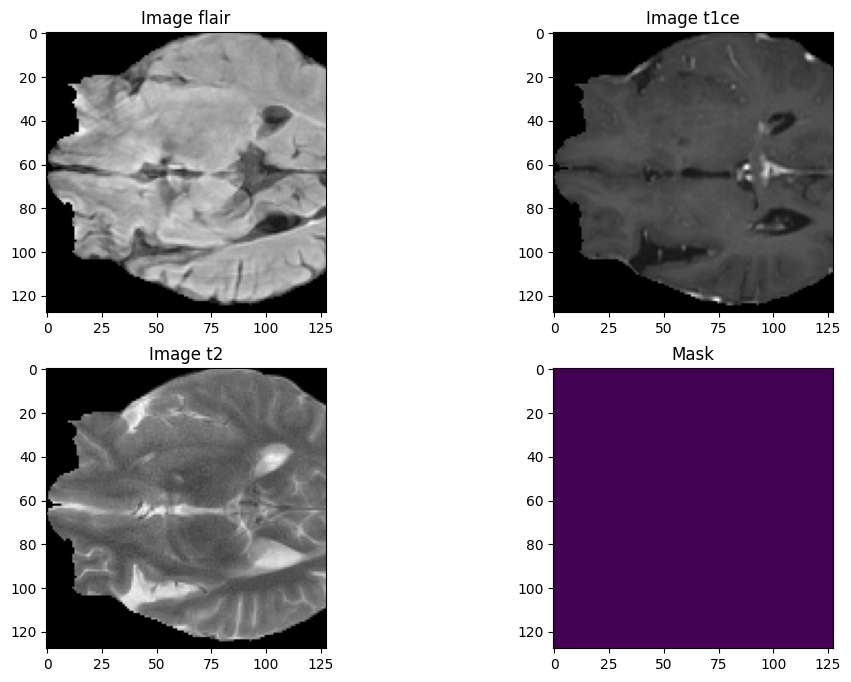

C:\Users\umara\AppData\Local\Temp\ipykernel_1612\3599348710.py:127: DeprecationWarning: <tifffile.imsave> is deprecated. Use tifffile.imwrite
  imsave('./data/BraTS2020_TrainingData/combined255.tif', combined_x)


Now preparing image and masks number:  0
Save Me
Now preparing image and masks number:  1
Save Me
Now preparing image and masks number:  2
Save Me
Now preparing image and masks number:  3
Save Me
Now preparing image and masks number:  4
I am useless
Now preparing image and masks number:  5
Save Me
Now preparing image and masks number:  6
Save Me
Now preparing image and masks number:  7
Save Me
Now preparing image and masks number:  8
Save Me
Now preparing image and masks number:  9
Save Me
Now preparing image and masks number:  10
Save Me
Now preparing image and masks number:  11
Save Me
Now preparing image and masks number:  12
Save Me
Now preparing image and masks number:  13
Save Me
Now preparing image and masks number:  14
Save Me
Now preparing image and masks number:  15
Save Me
Now preparing image and masks number:  16
Save Me
Now preparing image and masks number:  17
Save Me
Now preparing image and masks number:  18
Save Me
Now preparing image and masks number:  19
Save Me
Now p

In [1]:
# https://youtu.be/oB35sV1npVI
"""
Use this code to get your BRATS 2020 dataset ready for semantic segmentation. 
Code can be divided into a few parts....
#Combine 
#Changing mask pixel values (labels) from 4 to 3 (as the original labels are 0, 1, 2, 4)
#Visualize
https://pypi.org/project/nibabel/
All BraTS multimodal scans are available as NIfTI files (.nii.gz) -> commonly used medical imaging format to store brain imagin data obtained using MRI and describe different MRI settings
T1: T1-weighted, native image, sagittal or axial 2D acquisitions, with 1–6 mm slice thickness.
T1c: T1-weighted, contrast-enhanced (Gadolinium) image, with 3D acquisition and 1 mm isotropic voxel size for most patients.
T2: T2-weighted image, axial 2D acquisition, with 2–6 mm slice thickness.
FLAIR: T2-weighted FLAIR image, axial, coronal, or sagittal 2D acquisitions, 2–6 mm slice thickness.
#Note: Segmented file name in Folder 355 has a weird name. Rename it to match others.
"""


import numpy as np
import nibabel as nib
import glob
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from tifffile import imsave

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
##########################
#This part of the code to get an initial understanding of the dataset.
#################################
#PART 1: Load sample images and visualize
#Includes, dividing each image by its max to scale them to [0,1]
#Converting mask from float to uint8
#Changing mask pixel values (labels) from 4 to 3 (as the original labels are 0, 1, 2, 4)
#Visualize
###########################################
#View a few images

#Note: Segmented file name in Folder 355 has a weird name. Rename it to match others.

TRAIN_DATASET_PATH = './data/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/'
#VALIDATION_DATASET_PATH = 'BraTS2020_ValidationData/MICCAI_BraTS2020_ValidationData'

test_image_flair=nib.load(TRAIN_DATASET_PATH + 'BraTS20_Training_355/BraTS20_Training_355_flair.nii').get_fdata()
print(test_image_flair.max())
#Scalers are applied to 1D so let us reshape and then reshape back to original shape. 
test_image_flair=scaler.fit_transform(test_image_flair.reshape(-1, test_image_flair.shape[-1])).reshape(test_image_flair.shape)


test_image_t1=nib.load(TRAIN_DATASET_PATH + 'BraTS20_Training_355/BraTS20_Training_355_t1.nii').get_fdata()
test_image_t1=scaler.fit_transform(test_image_t1.reshape(-1, test_image_t1.shape[-1])).reshape(test_image_t1.shape)

test_image_t1ce=nib.load(TRAIN_DATASET_PATH + 'BraTS20_Training_355/BraTS20_Training_355_t1ce.nii').get_fdata()
test_image_t1ce=scaler.fit_transform(test_image_t1ce.reshape(-1, test_image_t1ce.shape[-1])).reshape(test_image_t1ce.shape)

test_image_t2=nib.load(TRAIN_DATASET_PATH + 'BraTS20_Training_355/BraTS20_Training_355_t2.nii').get_fdata()
test_image_t2=scaler.fit_transform(test_image_t2.reshape(-1, test_image_t2.shape[-1])).reshape(test_image_t2.shape)

test_mask=nib.load(TRAIN_DATASET_PATH + 'BraTS20_Training_355/BraTS20_Training_355_seg.nii').get_fdata()
test_mask=test_mask.astype(np.uint8)

print(np.unique(test_mask))  #0, 1, 2, 4 (Need to reencode to 0, 1, 2, 3)
test_mask[test_mask==4] = 3  #Reassign mask values 4 to 3
print(np.unique(test_mask)) 

import random
n_slice=random.randint(0, test_mask.shape[2])

plt.figure(figsize=(12, 8))

plt.subplot(231)
plt.imshow(test_image_flair[:,:,n_slice], cmap='gray')
plt.title('Image flair')
plt.subplot(232)
plt.imshow(test_image_t1[:,:,n_slice], cmap='gray')
plt.title('Image t1')
plt.subplot(233)
plt.imshow(test_image_t1ce[:,:,n_slice], cmap='gray')
plt.title('Image t1ce')
plt.subplot(234)
plt.imshow(test_image_t2[:,:,n_slice], cmap='gray')
plt.title('Image t2')
plt.subplot(235)
plt.imshow(test_mask[:,:,n_slice])
plt.title('Mask')
plt.show()



##################################################
#PART 2: Explore the process of combining images to channels and divide them to patches
#Includes...
#Combining all 4 images to 4 channels of a numpy array.
#
################################################
#Flair, T1CE, annd T2 have the most information
#Combine t1ce, t2, and flair into single multichannel image

combined_x = np.stack([test_image_flair, test_image_t1ce, test_image_t2], axis=3)

#Crop to a size to be divisible by 64 so we can later extract 64x64x64 patches. 
#cropping x, y, and z
#combined_x=combined_x[24:216, 24:216, 13:141]

combined_x=combined_x[56:184, 56:184, 13:141] #Crop to 128x128x128x4

#Do the same for mask
test_mask = test_mask[56:184, 56:184, 13:141]

n_slice=random.randint(0, test_mask.shape[2])
plt.figure(figsize=(12, 8))

plt.subplot(221)
plt.imshow(combined_x[:,:,n_slice, 0], cmap='gray')
plt.title('Image flair')
plt.subplot(222)
plt.imshow(combined_x[:,:,n_slice, 1], cmap='gray')
plt.title('Image t1ce')
plt.subplot(223)
plt.imshow(combined_x[:,:,n_slice, 2], cmap='gray')
plt.title('Image t2')
plt.subplot(224)
plt.imshow(test_mask[:,:,n_slice])
plt.title('Mask')
plt.show()


imsave('./data/BraTS2020_TrainingData/combined255.tif', combined_x)
np.save('./data/BraTS2020_TrainingData/combined255.npy', combined_x)
#Verify image is being read properly
#my_img=imread('BraTS2020_TrainingData/combined255.tif')

my_img=np.load('./data/BraTS2020_TrainingData/combined255.npy')

test_mask = to_categorical(test_mask, num_classes=4)
####################################################################
#####################################
#End of understanding the dataset. Now get it organized.
#####################################

#Now let us apply the same as above to all the images...
#Merge channels, crop, patchify, save
#GET DATA READY =  GENERATORS OR OTHERWISE

#Keras datagenerator does ntot support 3d

# # # images lists harley
#t1_list = sorted(glob.glob('BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/*/*t1.nii'))
t2_list = sorted(glob.glob('./data/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/*/*t2.nii'))
t1ce_list = sorted(glob.glob('./data/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/*/*t1ce.nii'))
flair_list = sorted(glob.glob('./data/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/*/*flair.nii'))
mask_list = sorted(glob.glob('./data/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/*/*seg.nii'))

#Each volume generates 18 64x64x64x4 sub-volumes. 
#Total 369 volumes = 6642 sub volumes

for img in range(len(t2_list)):   #Using t1_list as all lists are of same size
    print("Now preparing image and masks number: ", img)
      
    temp_image_t2=nib.load(t2_list[img]).get_fdata()
    temp_image_t2=scaler.fit_transform(temp_image_t2.reshape(-1, temp_image_t2.shape[-1])).reshape(temp_image_t2.shape)
   
    temp_image_t1ce=nib.load(t1ce_list[img]).get_fdata()
    temp_image_t1ce=scaler.fit_transform(temp_image_t1ce.reshape(-1, temp_image_t1ce.shape[-1])).reshape(temp_image_t1ce.shape)
   
    temp_image_flair=nib.load(flair_list[img]).get_fdata()
    temp_image_flair=scaler.fit_transform(temp_image_flair.reshape(-1, temp_image_flair.shape[-1])).reshape(temp_image_flair.shape)
        
    temp_mask=nib.load(mask_list[img]).get_fdata()
    temp_mask=temp_mask.astype(np.uint8)
    temp_mask[temp_mask==4] = 3  #Reassign mask values 4 to 3
    #print(np.unique(temp_mask))
    
    
    temp_combined_images = np.stack([temp_image_flair, temp_image_t1ce, temp_image_t2], axis=3)
    
    #Crop to a size to be divisible by 64 so we can later extract 64x64x64 patches. 
    #cropping x, y, and z
    temp_combined_images=temp_combined_images[56:184, 56:184, 13:141]
    temp_mask = temp_mask[56:184, 56:184, 13:141]
    
    val, counts = np.unique(temp_mask, return_counts=True)
    
    if (1 - (counts[0]/counts.sum())) > 0.01:  #At least 1% useful volume with labels that are not 0
        print("Save Me")
        temp_mask= to_categorical(temp_mask, num_classes=4)
        np.save('./data/BraTS2020_TrainingData/input_data_3channels/images/image_'+str(img)+'.npy', temp_combined_images)
        np.save('./data/BraTS2020_TrainingData/input_data_3channels/masks/mask_'+str(img)+'.npy', temp_mask)
        
    else:
        print("I am useless")   
   
     
################################################################
#Repeat the same from above for validation data folder OR
#Split training data into train and validation

"""
Code for splitting folder into train, test, and val.
Once the new folders are created rename them and arrange in the format below to be used
for semantic segmentation using data generators. 
pip install split-folders
"""
import splitfolders  # or import split_folders

input_folder = './data/BraTS2020_TrainingData/input_data_3channels/'
output_folder = './data/BraTS2020_TrainingData/input_data_128/'
# Split with a ratio.
# To only split into training and validation set, set a tuple to `ratio`, i.e, `(.8, .2)`.
splitfolders.ratio(input_folder, output=output_folder, seed=42, ratio=(.75, .25), group_prefix=None) # default values